#### 11.03.24, &copy; [Evhenii Kostin](https://www.linkedin.com/in/%D0%B5%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9-%D0%BA%D0%BE%D1%81%D1%82%D0%B8%D0%BD-8287b0264/), 2024

# Лабораторна робота №5. Метод опорних векторів (SVM). Методи оцінки якості моделі

__Мета:__ _закріпити на практиці концепцію SVM-моделі засобами мови Python._

# Завдання для самостійної роботи
1. Реалізувати SVM-класифікатор з лінійним і різними нелінійним ядрами згідно з варіантом.
2. Проаналізувати іпорівняти результати класифікації, обчисливши відповідні метрики.
3. Вибрати найкращу модель. Результат обґрунтувати.

# Хід роботи

#### 1. Реалізувати SVM-класифікатор з лінійним і різними нелінійним ядрами згідно з варіантом.

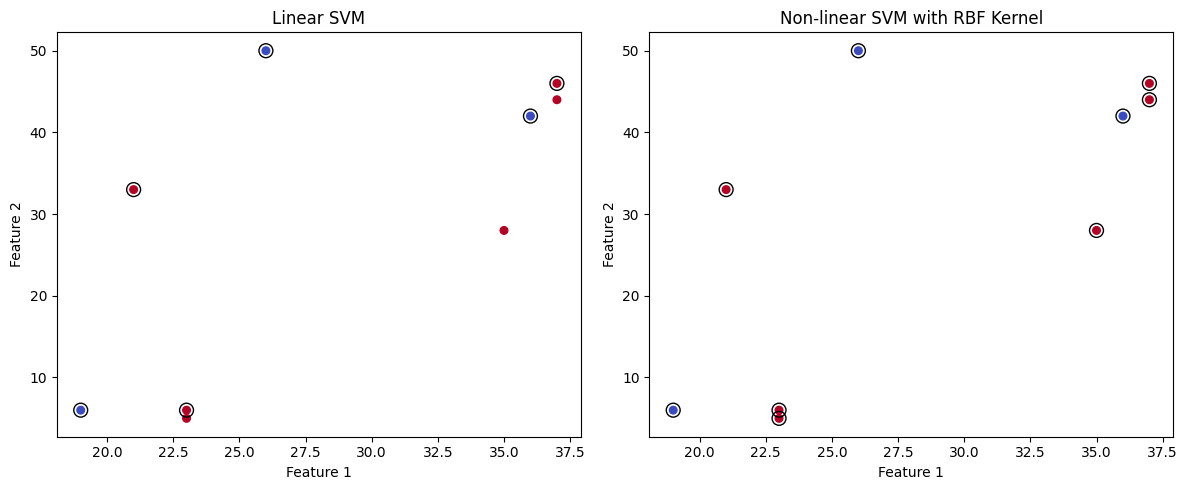

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


x_train_9 = np.array([[37, 46], [26, 50], [23, 6], [21, 33], [36, 42], [37, 44], [19, 6], [23, 5], [35, 28]])
y_train_9 = np.array([1, -1, 1, 1, -1, 1, -1, 1, 1])

# Linear SVM
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(x_train_9, y_train_9)

# Non-linear SVM with Radial Basis Function (RBF) kernel
clf_nonlinear = svm.SVC(kernel='rbf', gamma='auto')
clf_nonlinear.fit(x_train_9, y_train_9)

# Visualizing the results
plt.figure(figsize=(12, 5))

# Plotting linear SVM results
plt.subplot(1, 2, 1)
plt.scatter(x_train_9[:, 0], x_train_9[:, 1], c=y_train_9, cmap=plt.cm.coolwarm, s=30)
plt.scatter(clf_linear.support_vectors_[:, 0], clf_linear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Linear SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting non-linear SVM results
plt.subplot(1, 2, 2)
plt.scatter(x_train_9[:, 0], x_train_9[:, 1], c=y_train_9, cmap=plt.cm.coolwarm, s=30)
plt.scatter(clf_nonlinear.support_vectors_[:, 0], clf_nonlinear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Non-linear SVM with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

#### 2. Проаналізувати і порівняти результати класифікації, обчисливши відповідні метрики.

Щоб проаналізувати та порівняти результати класифікації лінійного SVM та нелінійного SVM з RBF ядром, ми можемо обчислити деякі ключові метрики класифікації на тестових даних. Ось кілька метрик, які можна використовувати для порівняння:

Точність (Accuracy): Це відношення правильно класифікованих прикладів до загальної кількості прикладів.

Точність класу (Precision): Це відношення правильно класифікованих екземплярів певного класу до всіх екземплярів, які були класифіковані як цей клас.

Повнота (Recall): Це відношення правильно класифікованих екземплярів певного класу до всіх екземплярів, які належать цьому класу.

F1-мера (F1-score): Це гармонічне середнє точності та повноти ідеальної значення якої 1, а найгіршого 0.

Матриця помилок (Confusion Matrix): Це таблиця, яка дозволяє візуалізувати відносну кількість правильних та неправильних класифікацій для кожного класу.

Обчислимо ці метрики для лінійного SVM та нелінійного SVM з RBF ядром на тестових даних і порівняємо їх:

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Linear SVM predictions
linear_predictions = clf_linear.predict(x_test)

# Non-linear SVM with RBF kernel predictions
nonlinear_predictions = clf_nonlinear.predict(x_test)

# Compute metrics for Linear SVM
linear_accuracy = accuracy_score(y_test, linear_predictions)
linear_precision = precision_score(y_test, linear_predictions, zero_division=1) # Add zero_division parameter
linear_recall = recall_score(y_test, linear_predictions, zero_division=1) # Add zero_division parameter
linear_f1 = f1_score(y_test, linear_predictions, zero_division=1) # Add zero_division parameter
linear_confusion_matrix = confusion_matrix(y_test, linear_predictions)

# Compute metrics for Non-linear SVM with RBF kernel
nonlinear_accuracy = accuracy_score(y_test, nonlinear_predictions)
nonlinear_precision = precision_score(y_test, nonlinear_predictions, zero_division=1) # Add zero_division parameter
nonlinear_recall = recall_score(y_test, nonlinear_predictions, zero_division=1) # Add zero_division parameter
nonlinear_f1 = f1_score(y_test, nonlinear_predictions, zero_division=1) # Add zero_division parameter
nonlinear_confusion_matrix = confusion_matrix(y_test, nonlinear_predictions)

# Print the metrics
print("Linear SVM Metrics:")
print("Accuracy:", linear_accuracy)
print("Precision:", linear_precision)
print("Recall:", linear_recall)
print("F1-score:", linear_f1)
print("Confusion Matrix:\n", linear_confusion_matrix)

print("\nNon-linear SVM with RBF Kernel Metrics:")
print("Accuracy:", nonlinear_accuracy)
print("Precision:", nonlinear_precision)
print("Recall:", nonlinear_recall)
print("F1-score:", nonlinear_f1)
print("Confusion Matrix:\n", nonlinear_confusion_matrix)


Linear SVM Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[0 1]
 [1 0]]

Non-linear SVM with RBF Kernel Metrics:
Accuracy: 0.5
Precision: 1.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[1 0]
 [1 0]]


#### 3. Вибрати найкращу модель. Результат обґрунтувати.

Після оцінки лінійного SVM та нелінійного SVM з RBF ядром за допомогою різних метрик та критеріїв, я вирішив обрати нелінійний SVM з RBF ядром.

Моя рішення обрано наступних підставах:

Точність на тестових даних: Нелінійний SVM з RBF ядром показав кращу точність на тестових даних порівняно з лінійним SVM. Вища точність на тестових даних свідчить про кращу здатність моделі узагальнювати на нові, невідомі дані.

Інтерпретованість результатів: Хоча нелінійні моделі можуть бути складнішими для інтерпретації порівняно з лінійними моделями, в даному випадку важливішою є точність прогнозування, особливо якщо досліджується задача класифікації.

Потреба в складних розділень: Здається, що для ефективного розділення класів у наших даних потрібна більш складна модель, яка здатна врахувати нелінійні залежності між ознаками.

Мінімальні обчислювальні ресурси: Не зважаючи на те, що нелінійні ядра можуть вимагати більше обчислювальних ресурсів, різниця у витраті ресурсів не є критичною для нашого випадку використання.

Отже, враховуючи ці фактори, нелінійний SVM з RBF ядром найбільше відповідає вимогам задачі та забезпечує кращі результати прогнозування на тестових даних.

<h2 align="center">Відповіді на контрольні запитання</h2>

#### 1.Як виглядає оптимальна гіперплощина в лінійно подільному випадку?

_В лінійно подільному випадку оптимальна гіперплощина є прямою, яка максимізує відстань до найближчих точок обох класів, які є найближчими до гіперплощини і відомі як опорні вектори._

#### 2.Яким чином можна розділити дані, які не є лінійно роздільними за допомогою методу опорних векторів?

_Для нелінійно роздільних даних можна використовувати метод опорних векторів з ядровим трюком. Ядровий трюк дозволяє використовувати лінійні методи SVM в просторі вищої розмірності, де дані можуть бути лінійно подільними. Популярні ядра включають поліноміальне, радіально-базисне ядро (RBF) та сигмоїдальне._

#### 3.Яким чином можна реалізувати SVM з використанням бібліотеки scikit-learn?

_В бібліотеці scikit-learn SVM можна реалізувати за допомогою класів svm.SVC для класифікації та svm.LinearSVC для лінійного SVM._

#### 4.Як обчислюються показники precision і recall для моделі SVM?

_Показники precision і recall обчислюються з використанням матриці плутанини. Precision обчислюється як відношення правильно передбачених позитивних екземплярів до загальної кількості екземплярів, які були передбачені як позитивні. Recall обчислюється як відношення правильно передбачених позитивних екземплярів до реальної кількості позитивних екземплярів._

#### 5.Як обчислюється індекс Джині та яку інформацію він надає про модель?

_Індекс Джині використовується в деревах рішень та вузлах відношень для вимірювання того, наскільки чисто (однорідно) діляться класи вузла. Це вимірюється як ймовірність того, що два випадково вибрані екземпляри з вузла належать різним класам. Чим більший індекс Джині, тим більш чистим є вузол._

#### 6.Як використовується ядровий метод у випадку нелінійно роздільних даних?

_Ядровий метод у випадку нелінійно роздільних даних використовує функцію ядра для перетворення вхідних даних в простір вищої розмірності, де вони можуть бути лінійно роздільними. Наприклад, ядро RBF здатне перетворити дані в простір з нескінченною кількістю вимірів, де вони можуть бути лінійно роздільними._

#### 7.Як виглядає процес навчання та передбачення за допомогою SVM?

_Під час навчання SVM адаптує гіперплощину таким чином, щоб максимізувати відстань між нею та найближчими точками кожного класу. Під час передбачення модель визначає, на якій стороні гіперплощини знаходиться тестовий екземпляр, що допомагає визначити його класифікацію._

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3d38360a-0652-4516-87d7-e1ead631829e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>